# Importing Libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats

import seaborn as sns; sns.set()

# Perfectly Linear Data Set

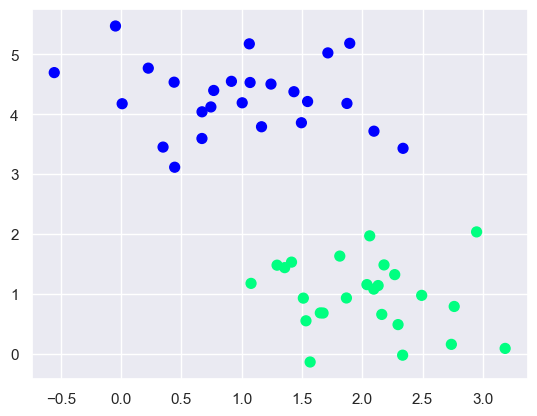

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'winter')

In [5]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [12]:
def plot_svc_decision_function(model, ax = None, plot_support = True):
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        
    #Create Grid to Evaluate the model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #Plot decision boundary and margins
    ax.contour(X, Y, P, colors = 'k',
              levels = [-1, 0, 1], alpha = 0.5,
               linestyles = ['--', '-', '--']
              )
    
    #Plot decision boundary
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:, 1],
                   s = 300, linewidth = 1, facecolors = 'none'
                  )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

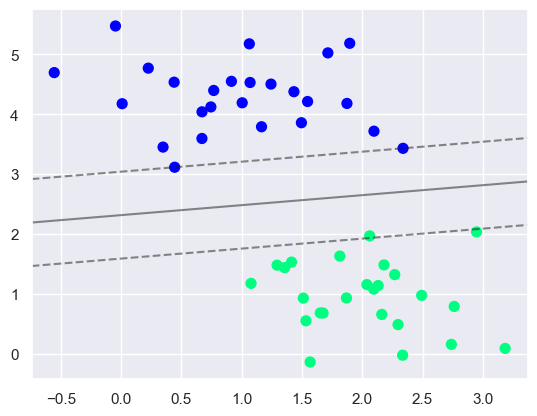

In [13]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'winter')
plot_svc_decision_function(model);